# Analysis of Computer Password Structure

This analysis focuses on computer passwords in order to better understand human behavior patterns in the structure of these devices. In plain terms, I hope to uncover common themes in the way we choose our passwords in order to improve the security of my own, as well as anybody else's who might be reading. 

To accomplish this, I will use a data set of 10 million passwords released by Mark Burnett in February of 2015. This data can be found [here](https://xato.net/passwords/ten-million-passwords/) (if that doesn't work, try [here](https://web.archive.org/web/20150316185559/https://xato.net/passwords/ten-million-passwords/) ). 

This analysis will consist of 3 parts:

1. Exploratory analysis examining common passwords, length of passwords, and structure of passwords
3. Benchmarking and demonstration of brute-force methods of password cracking
3. An algorithm to crack passwords using the Burnett data

I will leave password cracking based on username to future work. 

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import random
import numpy as np

In [4]:
rcParams['figure.figsize'] = 12, 9

In [6]:
df = pd.read_csv("/home/andrew/Desktop/10-million-combos.txt",
                 encoding='iso-8859-1',
                 sep='\t', 
                 error_bad_lines=False,
                warn_bad_lines=True,
                header=None,
                names= ['uname', 'pwd'],
                dtype={'uname':str,'pwd':str})
df=df.dropna(axis=0,how='any')

# Exploratory Data Analysis

###20 Most Popular Passwords

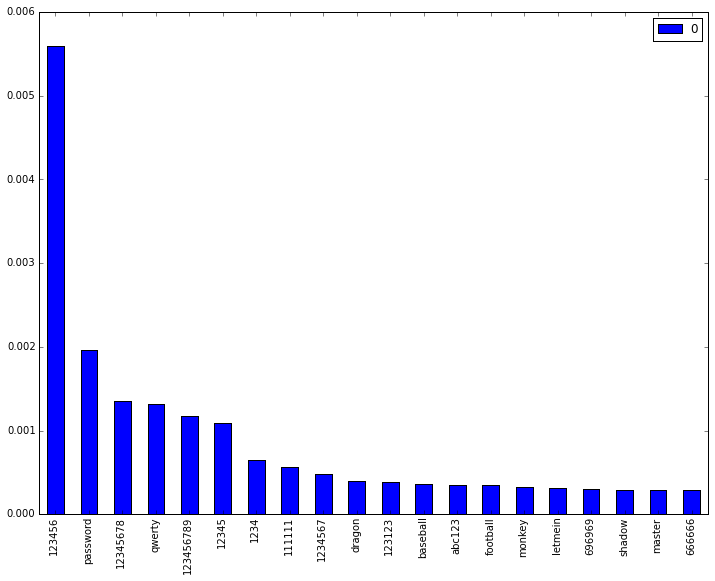

In [6]:
top_20 = pd.DataFrame(df['pwd'].value_counts(normalize=True)[:20])
top_20.plot(kind='bar')
plt.show()

### You could crack 18.6% of passwords by guessing only the top 10000

In [8]:
df['pwd'].value_counts(normalize=True).cumsum()[10000]

0.18594899997468248

### Length of Passwords

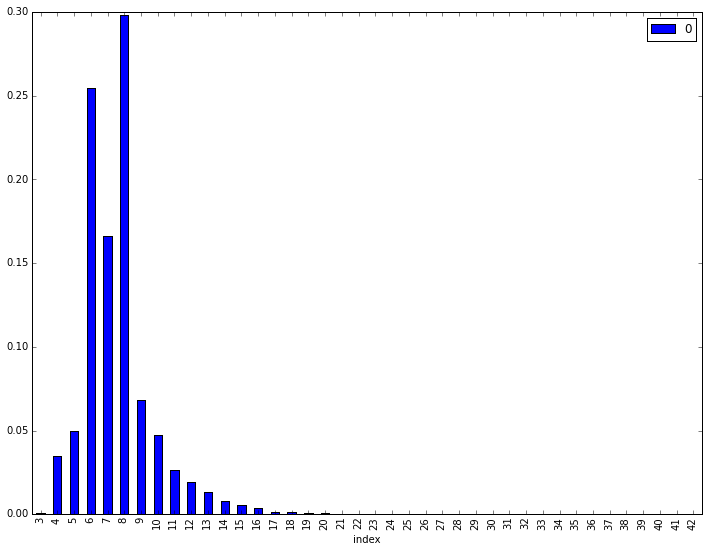

In [8]:
df['length'] = df.pwd.apply(len)
df['length'].value_counts(normalize=True).reset_index().sort(columns='index').plot(x='index', y=0, kind='bar')

# Brute Force Methods
For reference, all possible combinations by password length (given only uppercase, lowercase, and integers):

| Password Length | Possible Combinations | Cummulative | 
|---|----------| ----------|
| 1 | 62       |62|
| 2 | 3844     |3,906|
| 3 | 238328   |242,234 | 
| 4 | 14776336 |15,018,572|
|... | ... | ...|

First we need a method of sampling from some empirical discrete distribution. We will use this later to sample from the distribution of password length, at the very least.

We also will want to sample from the distribution of possible combinations by password length so we get the proper number of potential passwords for each password size. For example, since there are only 62 possible combinations of a 1-character password, it doesn't make sense that we would have a close-to-equal number of samples of that length as for a length of say 10. In other words, we want to generate random passwords of random lengths, but we want to generate a number of samples for each length that is proportional to the number of possible combinations. 



In [80]:
def emp_samp(ser, nsamp):
    '''
    ser is a pandas series
    nsamp is the number of samples from the empirical distribution to be returned
    '''
    cumsums = ser.value_counts(normalize=True).cumsum()
    result = np.empty(nsamp)
    for i in range(nsamp):
        uni = np.random.uniform()
        a = cumsums-uni
        m = min(i for i in a if i > 0)
        result[i] = cumsums[cumsums == m+uni].index[0]
        
    return result  
    

Upon testing the function on the password lengths we can see we are indeed sampling from the correct distribution

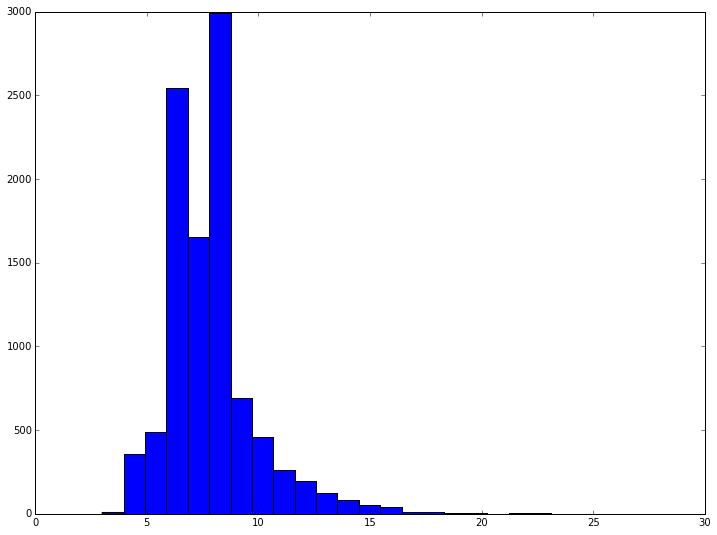

In [97]:
samp = emp_samp(df['length'],10000)
nbins = np.ptp(samp) +1
plt.hist(samp,nbins)
plt.show()

### Method 1 - Random Strings
This method generates random strings

In [125]:
import string
def rand_str(size):
    chars=string.ascii_uppercase + string.digits + string.ascii_lowercase
    return ''.join(random.choice(chars) for _ in range(int(size)))

##### Size determined by uniform distribution on [0,15)

In [130]:
%%time
nsamp = 10000
sizes = np.random.uniform(0,15,size=nsamp)
for i in range(nsamp):
    rand_str(sizes[i]) == 'foo'

CPU times: user 164 ms, sys: 4 ms, total: 168 ms
Wall time: 182 ms


##### Size determined by distribution of possible combinations

In [159]:
np.power(62,np.arange(3,42)).cumsum()

array([              238328,             15014664,            931147496,
                57731383080,        3579345989288,      221919451574184,
          13759005997837736,   853058371866177960, -8370313664988597848,
         853058371866177960, -8370313664988597848,   853058371866177960,
       -8370313664988597848,   853058371866177960, -8370313664988597848,
         853058371866177960, -8370313664988597848,   853058371866177960,
       -8370313664988597848,   853058371866177960, -8370313664988597848,
         853058371866177960, -8370313664988597848,   853058371866177960,
       -8370313664988597848,   853058371866177960, -8370313664988597848,
         853058371866177960, -8370313664988597848,   853058371866177960,
       -8370313664988597848,   853058371866177960, -8370313664988597848,
         853058371866177960, -8370313664988597848,   853058371866177960,
       -8370313664988597848,   853058371866177960, -8370313664988597848])

In [158]:
df['length'].value_counts(normalize=True).reset_index().sort(columns='index').set_index('index')

,0
index,
3,5.933841e-04
4,3.451721e-02
5,4.951276e-02
6,2.544476e-01
7,1.663156e-01
8,2.981521e-01
9,6.809303e-02
10,4.713042e-02
11,2.635478e-02


In [131]:
%%time
nsamp = 10000
sizes = emp_samp(df['length'],nsamp)
for i in range(nsamp):
    rand_str(sizes[i]) == 'foo'

CPU times: user 4.44 s, sys: 12 ms, total: 4.45 s
Wall time: 4.44 s


### Take 10000 Random Passwords to use as test set

In [6]:
rows = random.sample(list(df.index), 10000)
df_test = df.ix[rows]
df_train = df.drop(rows)
del df